In [1]:
using Plots
using LaTeXStrings

In [2]:
n = 60
x = range(0, stop=2π, length=n); @show length(x), x

s₁ = sin.(1 * x)
s₂ = sin.(2 * x) * 2.5
s₃ = sin.(3 * x) * 5
s₄ = sin.(4 * x) * 7.5;

(length(x), x) = (60, 0.0:0.10649466622338281:6.283185307179586)


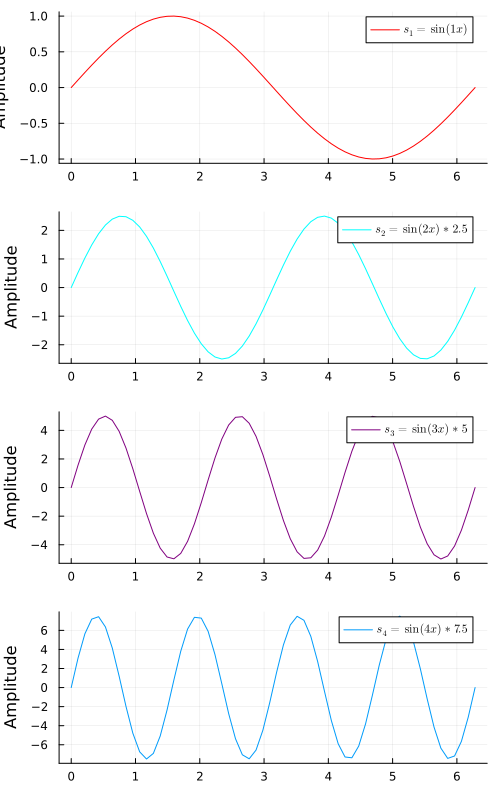

In [3]:
# Create a figure with subplots
fig₁ = plot(layout=(4, 1), size=(500, 800)
    # , legend=:topleft
    # , xlabel = "x"
    , ylabel = "Amplitude"
    # , title = "Multiple Sine Waves"
)

# Plotting
plot!(fig₁, x, s₄, subplot=4, label=L"s_4 = \sin(4x) * 7.5")
plot!(fig₁, x, s₃, subplot=3, label=L"s_3 = \sin(3x) * 5", linecolor="purple" )
plot!(fig₁, x, s₂, subplot=2, label=L"s_2 = \sin(2x) * 2.5", linecolor="cyan" )
plot!(fig₁, x, s₁, subplot=1, label=L"s_1 = \sin(1x)", linecolor="red" )

# Show the figure
display(fig₁)

The function 

$
f(x) = e^{-2(x - (\pi + 1))^2}
$

is a **Gaussian function** in compact form with:
- **Center**: $ \pi + 1 $,
- **Amplitude**: 1,
- **Width parameter**: $ \sqrt{\frac{1}{2}} $ (from $ a = 2 $).

### General Compact Description:
$
f(x) = e^{-a(x - b)^2},
$
where:
- $ a = 2 $,
- $ b = \pi + 1 $.

This describes a symmetric bell-shaped curve centered at $ x = \pi + 1 $, with a narrow spread.
$f = e^{-2 (x - (\pi + 1))^2}$

In [4]:
f(x) = ℯ.^(-2 .* (x .- (π + 1)).^2)

f (generic function with 1 method)

In [5]:
using LinearAlgebra

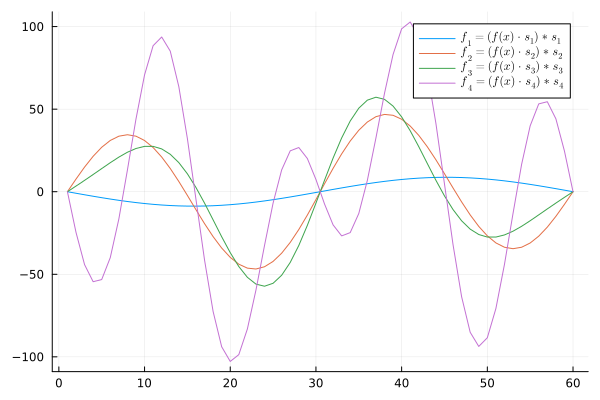

In [6]:
a₁ = f(x) ⋅ s₁; f₁ = a₁ * s₁; 
a₂ = f(x) ⋅ s₂; f₂ = a₁ * s₁ + a₂ * s₂;
a₃ = f(x) ⋅ s₃; f₃ = a₁ * s₁ + a₂ * s₂ + a₃ * s₃;
a₄ = f(x) ⋅ s₄; f₄ = a₁ * s₁ + a₂ * s₂ + a₃ * s₃ + a₄ * s₄;
plot(f₁, label=L"f_1 = (f(x) \cdot s_1) * s_1")
plot!(f₂, label=L"f_2 = (f(x) \cdot s_2) * s_2")
plot!(f₃, label=L"f_3 = (f(x) \cdot s_3) * s_3")
plot!(f₄, label=L"f_4 = (f(x) \cdot s_4) * s_4")

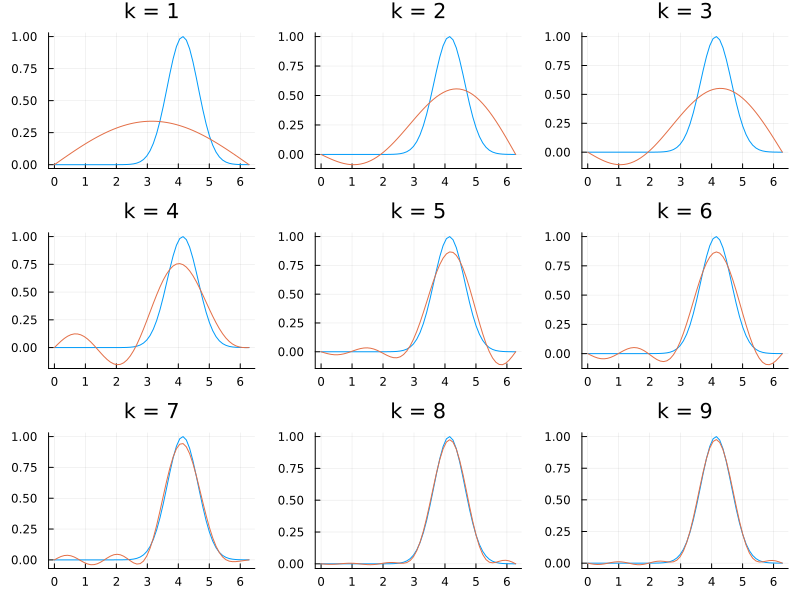

In [7]:
# Create a figure with subplots
fig = plot(layout=(3, 3), size=(800, 600))

approx = zeros(n)
for k in 1:9
    Sₙ = sin.(k * x / 2)
    Sₙ ./= √(Sₙ ⋅ Sₙ)  # Normalize s using broadcasting equivalent to Sₙ ./= norm(Sₙ)
    aₖ = f(x) ⋅ Sₙ  # Dot product of two arrays (inner product)
    approx = approx .+ aₖ .* Sₙ  # Update the approximation using broadcasting
    plot!(fig, x, f, label="Original", subplot=k, title="k = $k")
    plot!(fig, x , approx
        , label="Approximation"
        , subplot=k
        , legend = :false
    )
end

# Show the figure
display(fig)


Let's break down the code snippet step by step:

### Code Explanation:

#### 1. **Definition of $ S_n $:**
```julia
Sₙ = sin.(k * x / 2)
```
- $ Sₙ $ is defined as the element-wise sine function applied to $ k * x / 2 $.
- $ k $: A scalar or parameter.
- $ x $: A vector (or array).
- Result: $ Sₙ $ is a vector where each element is $ \sin(k x_i / 2) $ for the corresponding $ x_i $ in $ x $.

---

#### 2. **Normalization of $ S_n $:**
```julia
Sₙ ./= √(Sₙ ⋅ Sₙ)
```
- This normalizes $ Sₙ $, making it a unit vector:
  - **Dot Product:** $ Sₙ \cdot Sₙ = \sum Sₙ_i^2 $, which is the squared magnitude of the vector $ Sₙ $.
  - **Square Root:** $ \sqrt(Sₙ \cdot Sₙ) $ gives the magnitude (or norm) of $ Sₙ $.
  - **Broadcasting Division (`./=`):** Divides each element of $ Sₙ $ by the magnitude, scaling it to unit length.

Effectively, this is equivalent to:
```julia
Sₙ ./= norm(Sₙ)
```

---

#### 3. **Dot Product with $ f(x) $:**
```julia
aₖ = f(x) ⋅ Sₙ
```
- $ f(x) $: A vector derived from some function $ f $ applied to $ x $.
- $ Sₙ $: The normalized sine vector.
- **Dot Product:** Computes the projection of $ f(x) $ onto $ Sₙ $, yielding a scalar $ aₖ $.

This represents the inner product of the two vectors $ f(x) $ and $ Sₙ $.

---

#### 4. **Updating the Approximation:**
```julia
approx = approx .+ aₖ .* Sₙ
```
- $ approx $: A vector holding the current approximation of some series or representation.
- **Broadcasted Scalar Multiplication (`aₖ .* Sₙ`):**
  - Multiplies each element of $ Sₙ $ by the scalar $ aₖ $, yielding a scaled vector.
- **Broadcasted Addition (`.+`):**
  - Updates each element of $ approx $ by adding the corresponding element of the scaled vector $ aₖ \cdot Sₙ $.

This step likely adds the contribution of the current basis vector $ Sₙ $ (scaled by $ aₖ $) to the approximation.

---

### Overall Purpose:
The code appears to implement a **projection-based approximation** of $ f(x) $ in terms of a sine basis. Specifically:
- $ Sₙ $ serves as a normalized basis vector.
- $ aₖ $ computes the coefficient for projecting $ f(x) $ onto $ Sₙ $.
- $ approx $ accumulates these contributions iteratively, refining the approximation of $ f(x) $ as a sum of scaled sine basis functions.

---

### Mathematical Equivalent:
The operation resembles constructing an approximation of $ f(x) $ using an orthogonal sine basis:
$
\text{approximation} = \sum_{k} a_k S_k,
$
where:
- $ S_k = \sin(kx / 2) / \| \sin(kx / 2) \| $ (normalized basis),
- $ a_k = \langle f(x), S_k \rangle $ (dot product/projection of $ f(x) $ onto $ S_k $).

Let me know if you'd like more clarification or a numerical example!

Your function:

$
f(x) = \exp\left(-2 \cdot (x - (\pi + 1))^2\right)
$

is a **Gaussian function** centered at $ x = \pi + 1 $. Let’s explore its relationship to Fourier series and the code.

---

### Fourier Series and $ f(x) $
The function $ f(x) $ is not inherently periodic, but it can be approximated using a Fourier series within a finite interval, say $ x \in [a, b] $. The Fourier series allows us to represent $ f(x) $ as a sum of sines and cosines:

$
f(x) \approx \sum_{k=1}^N a_k \sin(kx / 2).
$

Here’s how your code approximates $ f(x) $ using **sine functions only**.

---

### Code Context with $ f(x) $
Given $ f(x) = \exp(-2 \cdot (x - (\pi + 1))^2) $, the function is sampled over a set of points $ x $, and the approximation is constructed using the **orthogonal sine basis**.

#### 1. Compute the Basis Function:
For each $ k $ in the loop:
$
S_n(x) = \sin\left(\frac{kx}{2}\right).
$
This basis function is normalized so it has unit magnitude:
$
S_n(x) \leftarrow \frac{S_n(x)}{\| S_n \|}.
$

#### 2. Project $ f(x) $ onto $ S_n $:
The code computes the Fourier coefficient $ a_k $ as:
$
a_k = \langle f(x), S_n(x) \rangle = \sum_{i=1}^n f(x_i) \cdot S_n(x_i),
$
which is the dot product in the discrete setting.

#### 3. Update the Approximation:
The cumulative approximation is updated by adding the scaled basis function:
$
\text{approx} \leftarrow \text{approx} + a_k S_n(x).
$

---

### Visualization:
1. **Original Function $ f(x) $:**
   - The Gaussian $ f(x) $ is plotted as the "original function."
   - It is smooth, non-periodic, and symmetric about $ x = \pi + 1 $.

2. **Approximation Steps:**
   - Each subplot shows how $ \text{approx} $ becomes closer to $ f(x) $ as more sine terms are added ($ k = 1 $ to $ 9 $).
   - Early approximations may capture only coarse features (e.g., symmetry), while later approximations better match $ f(x) $'s shape.

---

### Fourier Series and Gaussian Functions
Gaussian functions like $ f(x) $ have smooth decays and are well-approximated by Fourier series. However:
- The series will converge slower compared to periodic functions, as $ f(x) $ is not periodic.
- Sines alone may require more terms than if both sines and cosines were used (a full Fourier series).

Would you like help running or visualizing this approximation process for $ f(x) $?